## Indikator penilaian
## Wajib di google colab, jika tidak di google colab ada pengurangan nilai -5
## Pengerjaan harus sesuai template yang disediakan, jika tidak ada pengurangan nilai -5 (untuk memudahkan membaca code)
## share to arifromadhan19@gmail.com

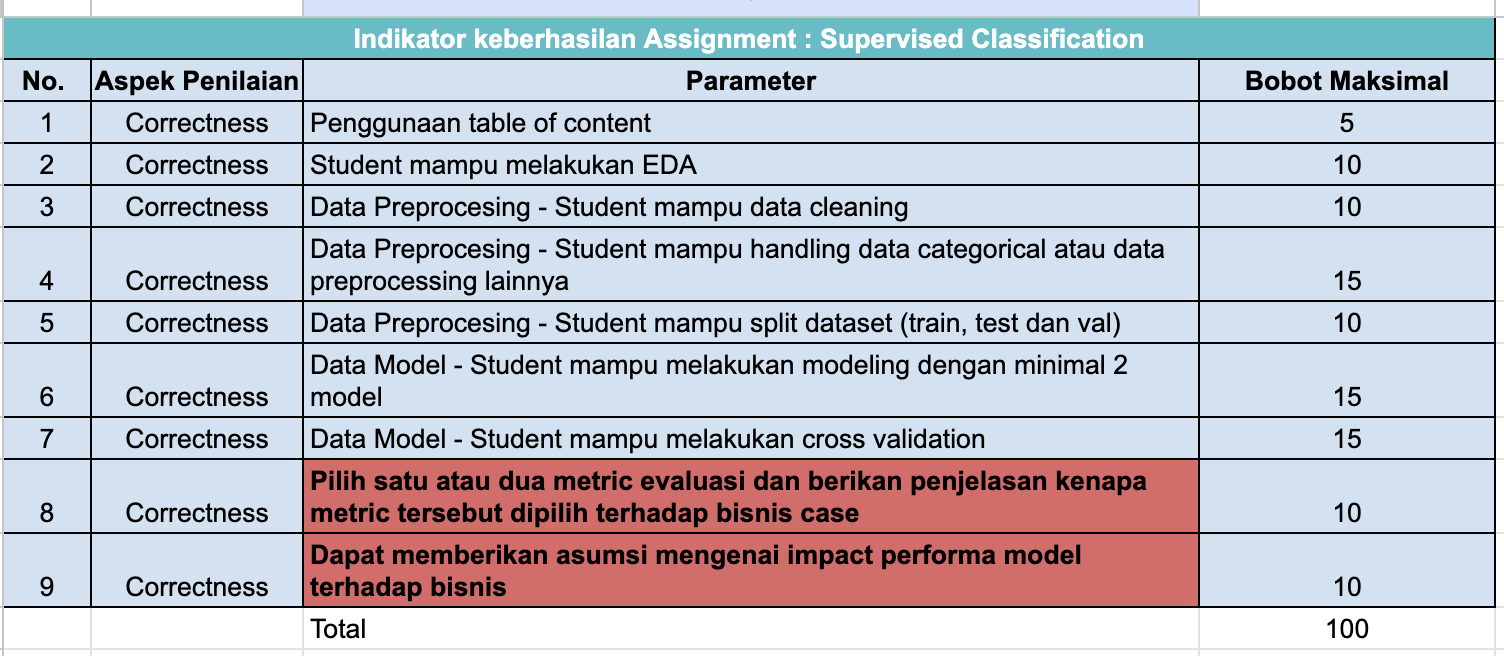

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## Load dataset

In [ ]:
df = pd.read_csv('/content/TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [ ]:
# Data duplicate
df.duplicated().sum()

0

In [ ]:
# Data type adjustment
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Missing value handling
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Drop missing value
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## EDA (Exploratory Dataset Analysis)

In [ ]:
# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Display columns by type
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
# Descriptive statistics for numerical columns
df[numerical_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Descriptive statistics for categorical data
df[categorical_cols].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


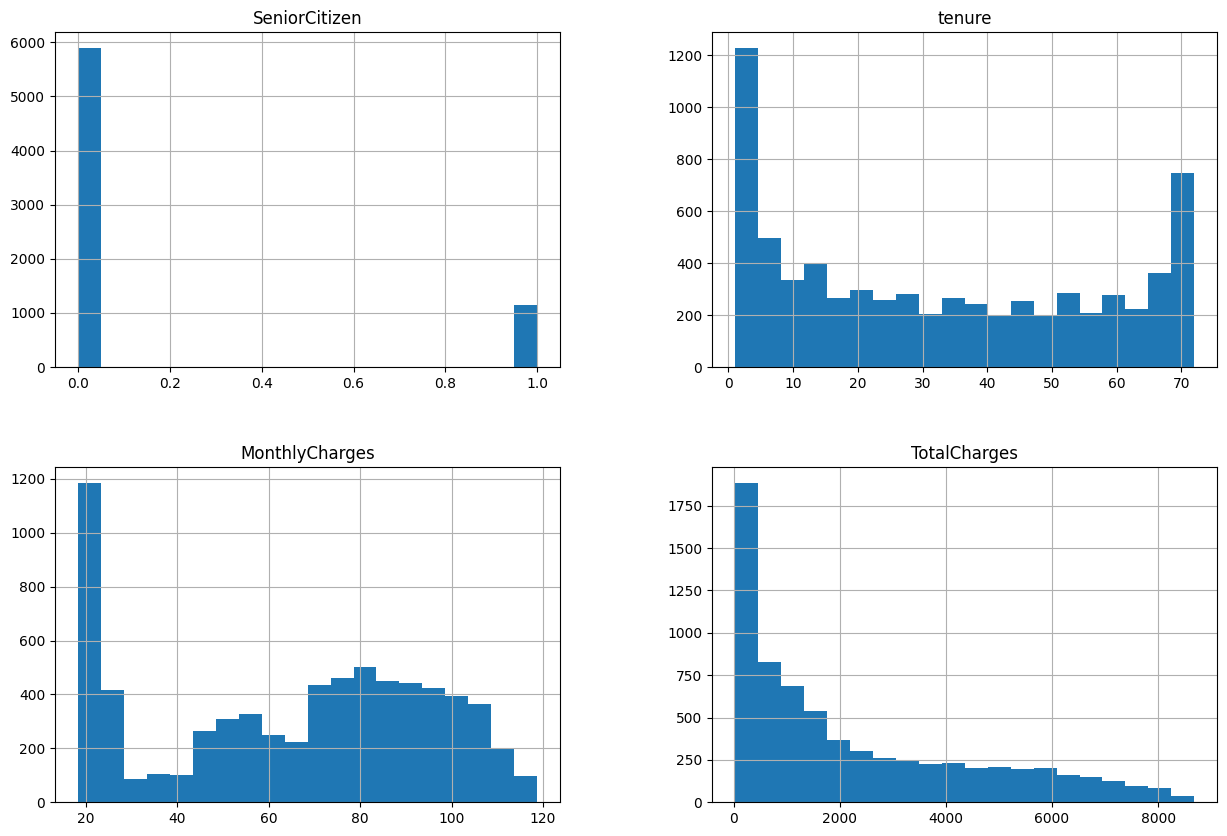

In [ ]:
# Distribution for numerical data
df.hist(bins=20, figsize=(15, 10))
plt.show()

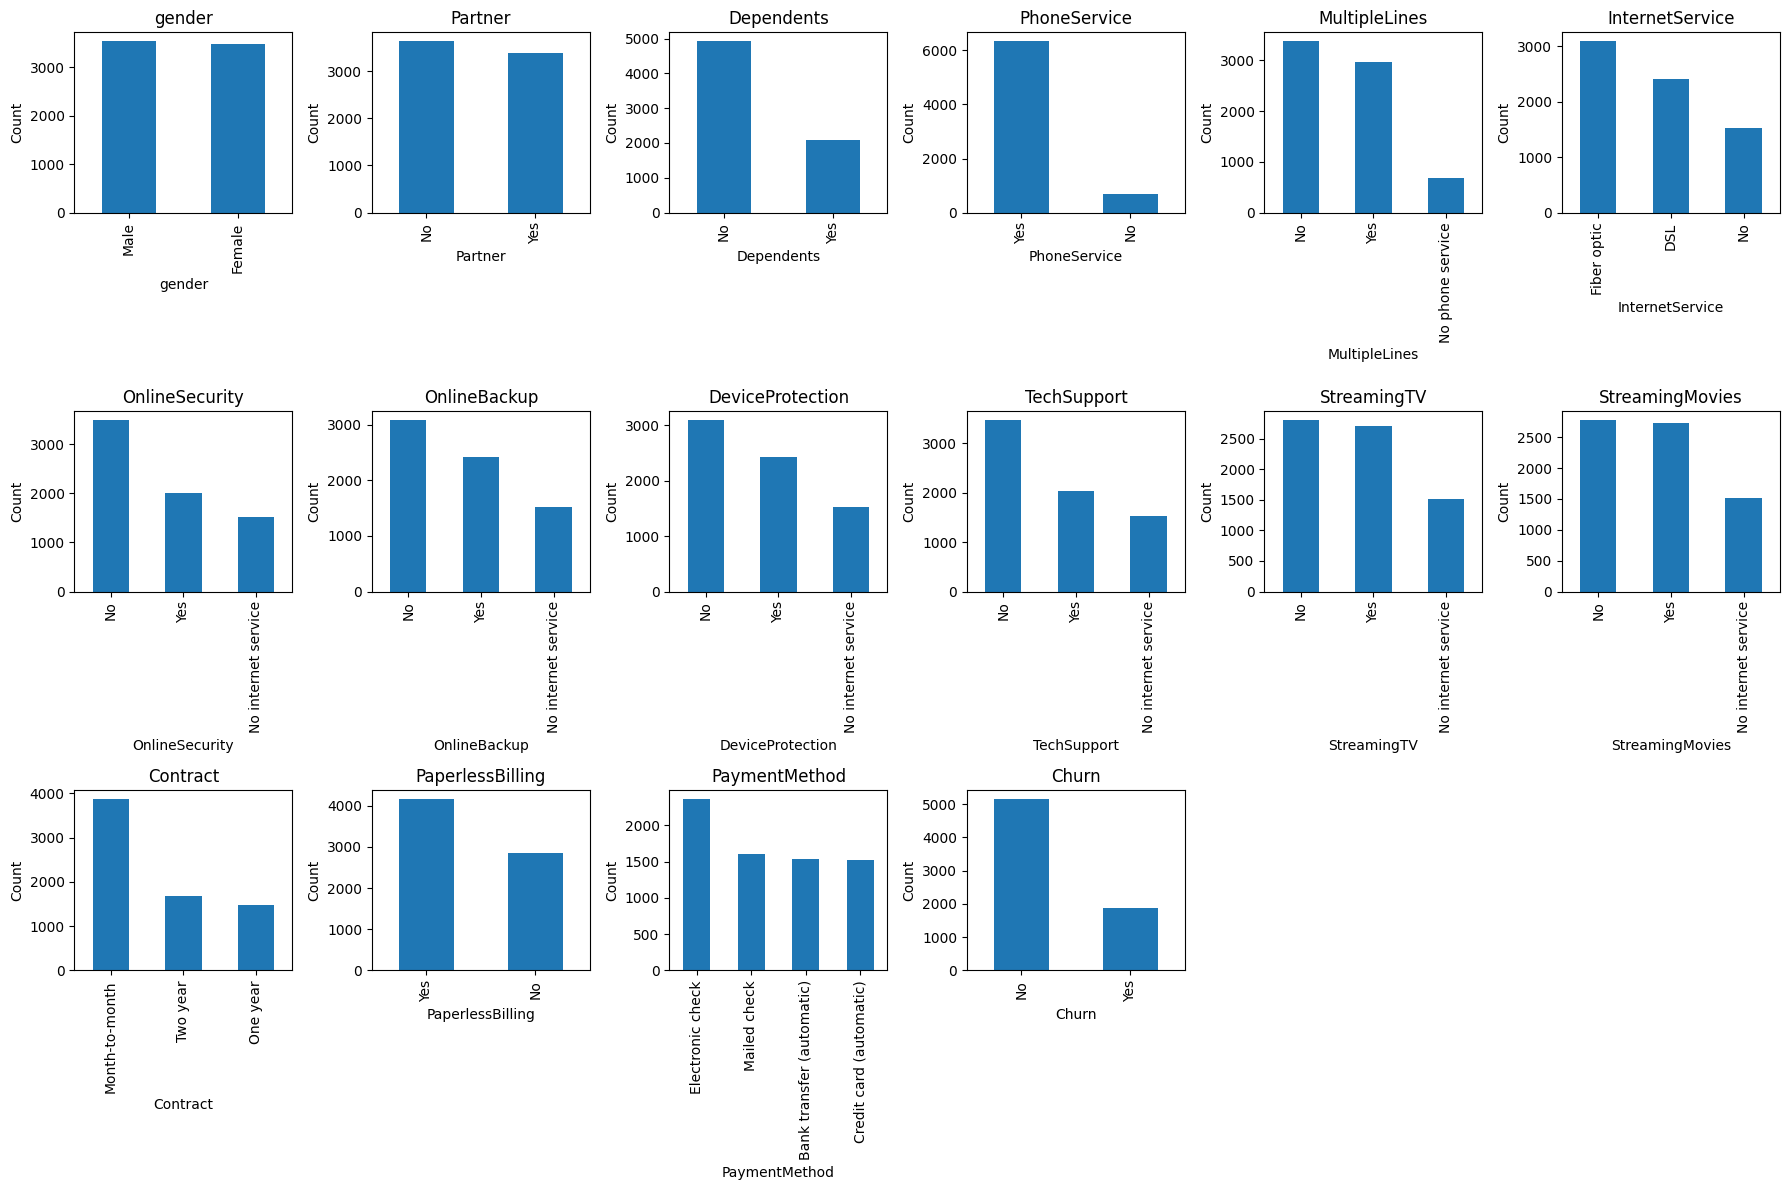

In [ ]:
# Distribution for categorical data
# Define the number of rows and columns for the 3x6 grid layout
rows = 3
cols = 6

# Create a figure with 3x6 subplots, adjusting the figure size for the canvas
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

# Flatten the axes array for easier access to individual subplots
axes = axes.flatten()

# Initialize a counter to track the used axes
used_axes = 0

# Loop through each column in df[categorical_cols] (excluding 'customerID')
for column in df[categorical_cols]:
    # Skip the 'customerID' column as it is not categorical data for plotting
    if column == 'customerID':
        continue

    # Plot the value counts of the categorical column as a bar chart
    df[column].value_counts().plot(kind='bar', title=column, ax=axes[used_axes])

    # Set the labels for the x-axis and y-axis
    axes[used_axes].set_ylabel('Count')
    axes[used_axes].set_xlabel(column)

    # Increment the used axes counter
    used_axes += 1

# Turn off any remaining empty subplots
for i in range(used_axes, len(axes)):
    axes[i].axis('off')

# Adjust the layout to ensure that the plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

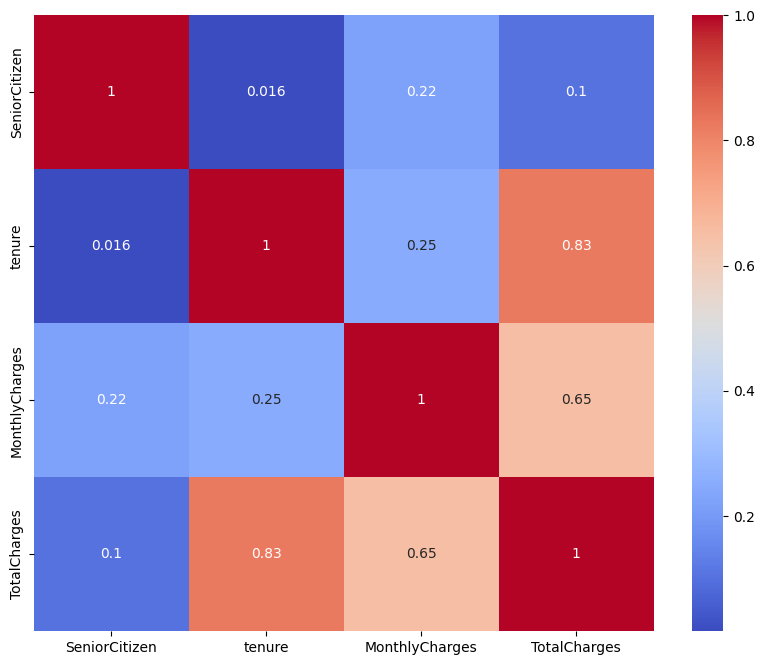

In [ ]:
# Correlation among numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

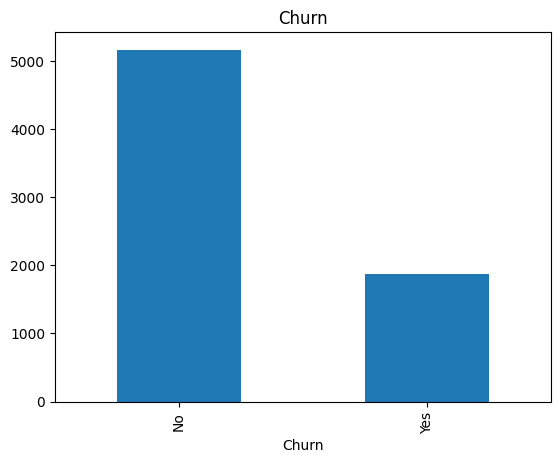

In [ ]:
# Visualize the target variable
if 'Churn' in df.columns:
    df['Churn'].value_counts().plot(kind='bar', title='Churn')
    plt.show()

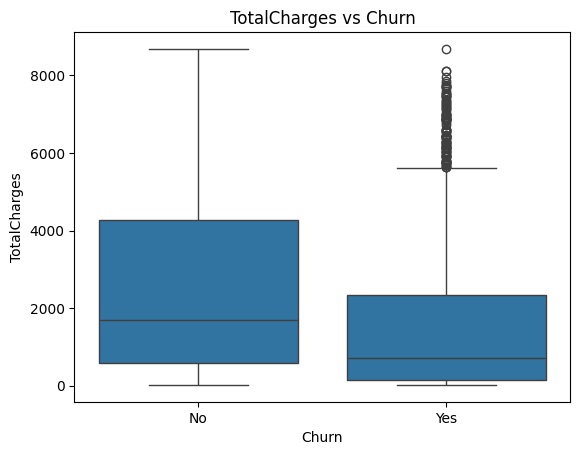

In [ ]:
# Bivariate analysis between TotalCharges and Churn
if 'Churn' in df.columns and 'TotalCharges' in df.columns:
    sns.boxplot(x='Churn', y='TotalCharges', data=df)
    plt.title('TotalCharges vs Churn')
    plt.show()

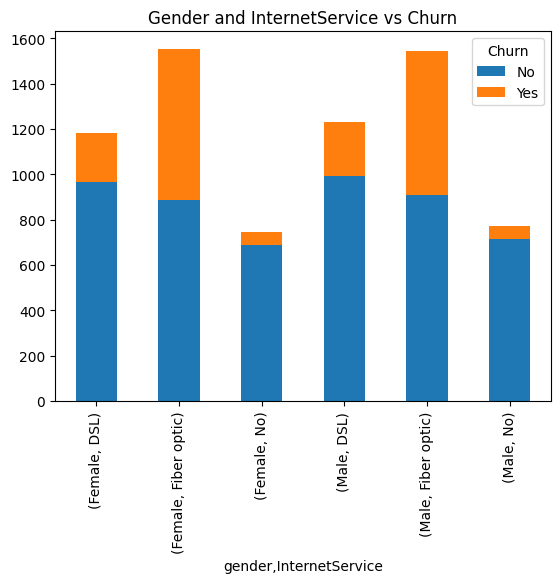

In [ ]:
# Example of multivariate analysis
if 'Churn' in df.columns and 'gender' in df.columns and 'InternetService' in df.columns:
    pd.crosstab([df['gender'], df['InternetService']], df['Churn']).plot(kind='bar', stacked=True)
    plt.title('Gender and InternetService vs Churn')
    plt.show()

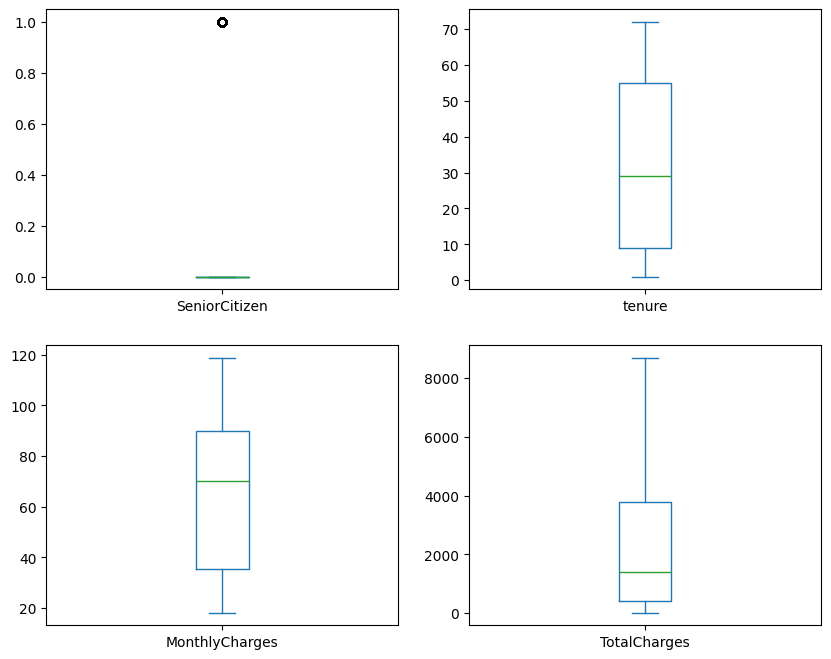

In [ ]:
# Detect outliers
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 8))
plt.show()

## Split Dataset

### Data Preprocessing

In [ ]:
# Categorical encoding
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Split data into train val & test

In [ ]:
# Split data into training validation and test
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into 70% train and 30% test_val
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Split test_val into 10% test and 20% validation
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

4922
1055
1055


## Oversampling test

In [ ]:
# # Separate features and target variable
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# # Split data into train, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# # Display target distribution in training set
# print("Training set target distribution:")
# print(y_train.value_counts())
# print(y_train.value_counts(normalize=True))  # Shows the percentage

# # Display target distribution in validation set
# print("\nValidation set target distribution:")
# print(y_val.value_counts())
# print(y_val.value_counts(normalize=True))  # Shows the percentage

# # Display target distribution in test set
# print("\nTest set target distribution:")
# print(y_test.value_counts())
# print(y_test.value_counts(normalize=True))  # Shows the percentage

In [ ]:
# # Apply SMOTE to the training data only
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# # Display target distribution in training set
# print("Training set target distribution:")
# print(y_train_resampled.value_counts())
# print(y_train_resampled.value_counts(normalize=True))  # Shows the percentage

# # Display target distribution in validation set
# print("\nValidation set target distribution:")
# print(y_val.value_counts())
# print(y_val.value_counts(normalize=True))  # Shows the percentage

# # Display target distribution in test set
# print("\nTest set target distribution:")
# print(y_test.value_counts())
# print(y_test.value_counts(normalize=True))  # Shows the percentage

In [ ]:
# # Create the model (Logistic Regression as an example; you can replace with other models)
# model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# # Train the model on the resampled training data
# model.fit(X_train_resampled, y_train_resampled)


In [ ]:
# # Evaluate the model on the validation set
# y_val_pred = model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_report = classification_report(y_val, y_val_pred)
# val_confusion = confusion_matrix(y_val, y_val_pred)

# print("Validation Set Evaluation:")
# print("Accuracy:", val_accuracy)
# print("\nClassification Report:\n", val_report)
# print("\nConfusion Matrix:\n", val_confusion)

# # Evaluate the model on the test set
# y_test_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_report = classification_report(y_test, y_test_pred)
# test_confusion = confusion_matrix(y_test, y_test_pred)

# print("\nTest Set Evaluation:")
# print("Accuracy:", test_accuracy)
# print("\nClassification Report:\n", test_report)
# print("\nConfusion Matrix:\n", test_confusion)


## Train and Val

### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

#### Logistic Regression

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model on the training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Random forest

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Decision Tree

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### XGBoost

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Evaluation

#### Logistic Regression

In [ ]:
# Predict on the validation data
y_val_pred = lr_model.predict(X_val)

# Evaluate the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
val_report = classification_report(y_val, y_val_pred)  # Generate detailed classification report

print("Accuracy on validation data:", val_accuracy)
print("\nClassification Report on validation data:\n", val_report)
print(confusion_matrix(y_val, y_val_pred))

Accuracy on validation data: 0.7876777251184834

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       781
           1       0.60      0.55      0.57       274

    accuracy                           0.79      1055
   macro avg       0.72      0.71      0.72      1055
weighted avg       0.78      0.79      0.78      1055

[[681 100]
 [124 150]]


In [ ]:
# Perform 5-fold cross-validation on the training data (X_train and y_train)
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Display the accuracy score for each fold in cross-validation
print("Cross-validation scores for each fold:", cv_scores)

# Display the average accuracy score across all folds
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.79796954 0.79187817 0.78861789 0.81199187 0.81504065]
Average cross-validation score: 0.8010996244480211


#### Random Forest

In [ ]:
# Predict on the validation data
y_val_pred = rf_model.predict(X_val)

# Evaluate the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
val_report = classification_report(y_val, y_val_pred)  # Generate detailed classification report

print("Accuracy on validation data:", val_accuracy)
print("\nClassification Report on validation data:\n", val_report)
print(confusion_matrix(y_val, y_val_pred))

Accuracy on validation data: 0.776303317535545

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       781
           1       0.59      0.46      0.51       274

    accuracy                           0.78      1055
   macro avg       0.71      0.67      0.68      1055
weighted avg       0.76      0.78      0.77      1055

[[694  87]
 [149 125]]


In [ ]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Display the accuracy score for each fold in cross-validation
print("Cross-validation scores for each fold:", cv_scores)

# Display the average accuracy score across all folds
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.80304569 0.77664975 0.78963415 0.80487805 0.81097561]
Average cross-validation score: 0.7970366472700261


#### Decision Tree

In [ ]:
# Predict on the validation data
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the Decision Tree model on the validation data
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)  # Calculate accuracy
val_report_dt = classification_report(y_val, y_val_pred_dt)  # Generate detailed classification report

print("Accuracy on validation data with Decision Tree:", val_accuracy_dt)
print("\nClassification Report on validation data with Decision Tree:\n", val_report_dt)
print(confusion_matrix(y_val, y_val_pred_dt))

Accuracy on validation data with Decision Tree: 0.728909952606635

Classification Report on validation data with Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       781
           1       0.48      0.52      0.50       274

    accuracy                           0.73      1055
   macro avg       0.65      0.66      0.66      1055
weighted avg       0.74      0.73      0.73      1055

[[627 154]
 [132 142]]


In [ ]:
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Display the accuracy score for each fold in cross-validation
print("Cross-validation scores for each fold:", cv_scores)

# Display the average accuracy score across all folds
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.73908629 0.72081218 0.73577236 0.72256098 0.72560976]
Average cross-validation score: 0.7287683133176509


#### XGBoost

In [ ]:
# Predict on the validation data
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model on the validation data
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
val_report_xgb = classification_report(y_val, y_val_pred_xgb)

print("Accuracy on validation data with XGBoost:", val_accuracy_xgb)
print("\nClassification Report on validation data with XGBoost:\n", val_report_xgb)
print(confusion_matrix(y_val, y_val_pred_xgb))

Accuracy on validation data with XGBoost: 0.7687203791469195

Classification Report on validation data with XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       781
           1       0.56      0.49      0.52       274

    accuracy                           0.77      1055
   macro avg       0.70      0.68      0.69      1055
weighted avg       0.76      0.77      0.76      1055

[[677 104]
 [140 134]]


In [ ]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Display the accuracy score for each fold in cross-validation
print("Cross-validation scores for each fold:", cv_scores)

# Display the average accuracy score across all folds
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.78781726 0.77360406 0.7652439  0.79471545 0.79268293]
Average cross-validation score: 0.7828127192439437


- Dari hasil evaluasi, Model Logistic Regression dan Random Forest memlikii performa terbaik dari keseluruhan model yang digunakan, namun model Logistic Regression menunjukkan hasil yang sedikit lebih baik dari model Random Forest dalam hal rata-rata akurasi pada validasi (78.76% vs. 77.60%) dan rata-rata cross-validation score (80.11% vs. 79.78%). Sehingga model inilah yang nantinya akan kita gunakan

## Test

In [ ]:
cv_scores = cross_val_score(lr_model, X_test, y_test, cv=5, scoring='accuracy')

# Display the accuracy score for each fold in cross-validation
print("Cross-validation scores for each fold:", cv_scores)

# Display the average accuracy score across all folds
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.76303318 0.76303318 0.78672986 0.80094787 0.82938389]
Average cross-validation score: 0.7886255924170615


In [ ]:
# Predict on the test data
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy on test set
test_report = classification_report(y_test, y_test_pred)  # Generate classification report
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)  # Generate confusion matrix

print("Accuracy on test data:", test_accuracy)
print("\nClassification Report on test data:\n", test_report)
print("\nConfusion Matrix on test data:\n", test_confusion_matrix)

Accuracy on test data: 0.795260663507109

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       768
           1       0.65      0.54      0.59       287

    accuracy                           0.80      1055
   macro avg       0.74      0.72      0.73      1055
weighted avg       0.79      0.80      0.79      1055


Confusion Matrix on test data:
 [[684  84]
 [132 155]]


Analisis Performa Model
- Overall Accuracy:

Akurasi model sebesar 79.52% menunjukkan bahwa secara keseluruhan model mampu membuat prediksi yang benar sekitar 80% dari waktu.
Namun, akurasi bukanlah metrik utama untuk masalah churn, karena fokus utama Kita adalah menangkap kelas churn (kelas 1).
Precision dan Recall untuk Kelas Churn (Kelas 1):

- Precision (Kelas 1): 0.65
Artinya, 65% dari pelanggan yang diprediksi churn benar-benar churn. False positives tetap ada, tetapi tingkat presisi ini cukup moderat.
- Recall (Kelas 1): 0.54
Artinya, hanya 54% dari total pelanggan yang benar-benar churn berhasil dideteksi oleh model. Ini berarti masih ada 46% churn yang tidak terdeteksi (false negatives).
- F1-Score (Kelas 1): 0.59
Kombinasi precision dan recall menunjukkan bahwa model masih dapat ditingkatkan untuk lebih efektif mendeteksi churn.
Confusion Matrix:

- True Negatives (TN): 684
Pelanggan yang benar-benar tidak churn dan diklasifikasikan dengan benar.
- False Positives (FP): 84
Pelanggan yang tidak churn tetapi diklasifikasikan sebagai churn (berpotensi menyebabkan tindakan yang tidak diperlukan).
- False Negatives (FN): 132
Pelanggan yang churn tetapi tidak terdeteksi (dapat menyebabkan hilangnya pelanggan karena tidak ada intervensi).
- True Positives (TP): 155
Pelanggan yang benar-benar churn dan diklasifikasikan dengan benar.

Oleh karena itu perlu dilakukan penyesuaian kembali terhadap model yang akan digunakan

Metrik Terpenting Berdasarkan Fokus Bisnis
1. Jika Tujuan Utama adalah Mengurangi Kehilangan Pelanggan:
- Fokus pada recall untuk memastikan sebanyak mungkin pelanggan churn terdeteksi.
- Gunakan strategi untuk meningkatkan recall meskipun precision sedikit berkurang.
2. Jika Tujuan Utama adalah Efisiensi Biaya Retensi:
- Fokus pada precision, sehingga Anda hanya menargetkan pelanggan yang benar-benar berisiko.
- Ini mengurangi false positives dan biaya insentif yang tidak perlu.
3. Jika Tujuan adalah Keseimbangan Antara Retensi dan Biaya:
- Fokus pada F1-score, yang menggabungkan recall dan precision untuk memberikan gambaran keseimbangan antara mendeteksi churn dan efisiensi.

### Tunning model + Evaluation

In [ ]:
# Oversampling Training Set

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Initialize the Logistic Regression model
best_model = LogisticRegression(class_weight='balanced',random_state=42)

# Train the model on the training data
best_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Predict on the validation data
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
val_report = classification_report(y_val, y_val_pred)  # Generate detailed classification report

print("Accuracy on validation data:", val_accuracy)
print("\nClassification Report on validation data:\n", val_report)
print(confusion_matrix(y_val, y_val_pred))

Accuracy on validation data: 0.7488151658767772

Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       781
           1       0.51      0.74      0.61       274

    accuracy                           0.75      1055
   macro avg       0.70      0.75      0.71      1055
weighted avg       0.79      0.75      0.76      1055

[[587 194]
 [ 71 203]]


In [ ]:
# Tunning parameter
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers for logistic regression
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced',random_state=42), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}


In [ ]:
# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy on test set
test_report = classification_report(y_test, y_test_pred)  # Generate classification report
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)  # Generate confusion matrix

print("Accuracy on test data:", test_accuracy)
print("\nClassification Report on test data:\n", test_report)
print("\nConfusion Matrix on test data:\n", test_confusion_matrix)

Accuracy on test data: 0.7563981042654029

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       768
           1       0.54      0.73      0.62       287

    accuracy                           0.76      1055
   macro avg       0.71      0.75      0.72      1055
weighted avg       0.79      0.76      0.77      1055


Confusion Matrix on test data:
 [[588 180]
 [ 77 210]]


In [ ]:
# Adjust threshold
threshold = 0.4
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)

# Re-evaluate with adjusted threshold
print(classification_report(y_test, y_test_pred_adjusted))
print(confusion_matrix(y_test, y_test_pred_adjusted))


              precision    recall  f1-score   support

           0       0.91      0.71      0.80       768
           1       0.51      0.81      0.63       287

    accuracy                           0.74      1055
   macro avg       0.71      0.76      0.71      1055
weighted avg       0.80      0.74      0.75      1055

[[546 222]
 [ 55 232]]


**Hasil Evaluasi Model :**
1. Kelas 0 (Tidak Churn):
- Precision: 0.91 :
Dari semua prediksi "tidak churn," 91% di antaranya benar.
Ini menunjukkan bahwa model sangat baik dalam menghindari false positives untuk kelas 0.
- Recall: 0.71 :
Dari semua pelanggan yang benar-benar tidak churn, 71% di antaranya berhasil diprediksi dengan benar oleh model.
Masih ada 29% pelanggan yang sebenarnya tidak churn tetapi diklasifikasikan sebagai churn (false positives).
- F1-Score: 0.80 :
Kombinasi precision dan recall menunjukkan performa yang solid untuk kelas 0.
2. Kelas 1 (Churn):
- Precision: 0.51:
Dari semua prediksi "churn," 51% di antaranya benar-benar churn.
Precision rendah ini menunjukkan bahwa ada cukup banyak false positives di kelas 1, yaitu pelanggan yang sebenarnya tidak churn tetapi diprediksi churn.
- Recall: 0.81:
Dari semua pelanggan yang benar-benar churn, 81% berhasil dideteksi.
Recall tinggi ini menunjukkan bahwa model berhasil menangkap sebagian besar pelanggan churn, sehingga lebih sedikit pelanggan yang terlewat (false negatives).
- F1-Score: 0.63 :
Kombinasi precision dan recall untuk kelas 1 menunjukkan performa yang moderat.

---

Confusion Matrix:
- True Positives (TP): 232
Pelanggan yang benar-benar churn dan berhasil diklasifikasikan dengan benar.
- False Negatives (FN): 55
Pelanggan yang sebenarnya churn tetapi tidak terdeteksi.
- True Negatives (TN): 546
Pelanggan yang benar-benar tidak churn dan diklasifikasikan dengan benar.
- False Positives (FP): 222
Pelanggan yang sebenarnya tidak churn tetapi diprediksi churn.

---
Akurasi: 74%

Secara keseluruhan, 74% dari semua prediksi model adalah benar.

**Kelebihan dan Kekurangan**

Kelebihan:
- Recall Tinggi untuk Kelas 1 (Churn):
Dengan recall sebesar 81%, model berhasil mendeteksi mayoritas pelanggan yang churn. Hal ini sangat penting karena mendeteksi churn secara proaktif dapat membantu perusahaan melakukan intervensi tepat waktu.
- Precision Tinggi untuk Kelas 0 (Tidak Churn):
Precision sebesar 91% menunjukkan bahwa model sangat jarang salah dalam mengidentifikasi pelanggan yang tidak churn, sehingga mengurangi intervensi yang tidak perlu untuk pelanggan loyal.

Kekurangan:
- Precision Rendah untuk Kelas 1 (Churn):
Precision sebesar 51% berarti hampir separuh dari pelanggan yang diprediksi churn sebenarnya tidak churn (false positives). Ini dapat menyebabkan biaya tambahan karena perusahaan mungkin mencoba menyelamatkan pelanggan yang sebenarnya tidak akan churn.
- False Positives Relatif Tinggi:
Sebanyak 222 pelanggan yang sebenarnya tidak churn diklasifikasikan sebagai churn, yang berpotensi meningkatkan biaya retensi yang tidak diperlukan.


### Potential impact

# Potential Impact Analysis of Churn Prediction Model

## 1. Confusion Matrix Summary
- **True Positives (TP):** 232
  - Pelanggan yang benar-benar churn dan berhasil terdeteksi oleh model.
- **False Positives (FP):** 222
  - Pelanggan yang sebenarnya tidak churn, tetapi diprediksi sebagai churn.
- **True Negatives (TN):** 546
  - Pelanggan yang benar-benar tidak churn dan diklasifikasikan dengan benar.
- **False Negatives (FN):** 55
  - Pelanggan yang sebenarnya churn tetapi tidak terdeteksi oleh model.

---

## 2. Business Assumptions
- **Customer Lifetime Value (CLV):** $100/pelanggan

- **Biaya Intervensi:** $10/pelanggan

- **Probabilitas Retensi (Efektivitas Intervensi):** 50% dari pelanggan churn yang terdeteksi dapat diselamatkan.

---

## 3. Quantitative Impact
### True Positives (TP)
- **Jumlah:** 232
- **Pendapatan yang diselamatkan:**
  $232 \times 0.5 \times 100 = 11,600 \, \text{USD}$



### False Negatives (FN)
- **Jumlah:** 55
- **Pendapatan yang hilang:**
  $55 \times 100 = 5,500 \, \text{USD}$



### False Positives (FP)
- **Jumlah:** 222
- **Biaya intervensi yang tidak perlu:**
  $222 \times 10 = 2,220 \, \text{USD}$



### Total Impact
- **Dampak Positif dari True Positives (TP):** $11,600$
- **Kerugian dari False Negatives (FN):** -$5,500$
- **Kerugian dari False Positives (FP):** -$2,220$
- **Total Dampak Bersih:**
  $11,600 - (5,500 + 2,220) = 3,880 \, \text{USD}$

---

## 5. Insights and Recommendations
### Strengths:
- **Recall Tinggi (81%):**
  - Sebagian besar pelanggan churn berhasil dideteksi, memungkinkan perusahaan untuk melakukan intervensi tepat waktu.
- **Efisiensi untuk Pelanggan Loyal:**
  - True Negatives (546) memastikan tidak ada sumber daya yang terbuang untuk pelanggan yang tidak membutuhkan intervensi.

### Weaknesses:
- **Precision Rendah (51%):**
  - Banyak false positives (222), yang meningkatkan biaya intervensi yang tidak diperlukan.
- **False Negatives (55):**
  - Pelanggan churn yang terlewatkan masih menyebabkan kehilangan pendapatan yang signifikan.

### Recommendations:
1. **Optimalkan Threshold:**
   - Sesuaikan threshold untuk meningkatkan precision tanpa terlalu banyak mengorbankan recall.
2. **Segmentasi Pelanggan:**
   - Berikan intervensi yang berbeda berdasarkan tingkat probabilitas churn (misalnya, diskon besar untuk probabilitas > 0.7, dan promosi ringan untuk probabilitas 0.5–0.7).
3. **Monitor dan Update Model:**
   - Pelanggan dan pola churn dapat berubah seiring waktu, jadi pastikan model diperbarui secara berkala.
4. **Investasi pada Recall:**
   - Karena dampak dari pelanggan churn (false negatives) lebih besar dibandingkan biaya false positives, recall tetap menjadi prioritas.

---

## 6. Conclusion
- Model ini memberikan dampak positif bersih sebesar **$3,880 USD** setelah mempertimbangkan pendapatan yang diselamatkan, pendapatan yang hilang, dan biaya intervensi.
- Dengan optimasi lebih lanjut, dampak bisnis dapat ditingkatkan dengan mengurangi false positives dan mempertahankan recall yang tinggi.
